In [1]:
import networkx as nx
import numpy as np
import tweepy, gensim, nltk, yaml, os, sys
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
%matplotlib inline
nltk.download('vader_lexicon')
from scipy.spatial import distance

sys.path.append(os.path.abspath("../../src/"))
from helper.utils import *

# cred = yaml.load(open('../../res/credentials.yml'))
# auth = tweepy.OAuthHandler(cred['twitter']['CONSUMER_KEY'], cred['twitter']['CONSUMER_SECRET'])
# auth.set_access_token(cred['twitter']['ACCESS_TOKEN'], cred['twitter']['ACCESS_TOKEN_SECRET'])
# 
# api = tweepy.API(auth)

twaccess = TwitterAccess('../../res/credentials.yml')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/piemontec/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
%%time
# stackoverflow
search_options = {
    'q':          'putin',      # query
    'lang':       'en',         # language
    'tweet_mode': 'extended'    # get full tweet text
}
statuses = tweepy.Cursor(twaccess.api.search, **search_options).items(1000)
tweets   = [[convert(status)] for status in statuses if is_response(status)]
convs    = [extend(twaccess.api, tweet) for tweet in tweets]

print('Response tweets:', len(tweets))
print('Max conversation length:', max([len(i) for i in convs]), '\n')

Response tweets: 162
Max conversation length: 107 

CPU times: user 8.96 s, sys: 802 ms, total: 9.76 s
Wall time: 3min 30s


In [10]:
len(convs)
merged_convs = unify(convs)
len(a)

116

In [ ]:
# def extendd(api, conversation):
#     last_tweet = conversation[-1]
#     conversation_extended = conversation
#     if last_tweet.reply_to is not None:
#         try:
#             responded_status = api.get_status(last_tweet.reply_to, tweet_mode='extended')
#             responded_tweet  = convert(responded_status)
#             conversation_extended = extend(api, conversation_extended + [responded_tweet])
#         except:
#             conversation[-1].reply_to = None
#     return conversation_extended

In [22]:
# tveets = [tweet[0] for tweet in tweets]
users  = {tweet.user: tweet for tweet in tveets}

In [16]:
for i in merged_convs:
    print(len(i))

2
2
3
5
4
88
2
10
2
2
1
35
2
2
3
2
4
2
3
2
2
48
2
2
4
4
2
2
2
2
18
2
2
2
12
2
3
2
4
2
5
3
3
2
5
2
2
12
1
4
2
5
2
6
2
2
8
4
3
2
2
2
2
5
2
2
3
5
2
2
4
2
4
2
6
2
2
2
2
2
2
2
2
3
3
2
2
2
4
2
2
6
4
2
2
2
2
1
2
5
8
2
2
2
2
1
2
2
3
107
2
3
2
2
4
2


In [25]:
type())

helper.utils.Tweet

In [26]:
%%time

plt.rcParams["figure.figsize"] = [15, 7]
plt.style.use('ggplot')

ConvGraph = nx.DiGraph()

# model = gensim.models.KeyedVectors.load_word2vec_format('../../models/pretrained/GoogleNews-vectors-negative300.bin.gz', binary=True)
conv_lunghe = [conv for conv in merged_convs if len(conv) > 100]
longest_conv = [max(merged_convs, key=len)]

for conv in longest_conv:
    for i, tweet in enumerate(conv):
        similarity = 0.0
        if tweet.reply_to is not None:
            # text_source_avg_vector = avg_sentence_vector(conv[i].text.split(),   model=model)
            # text_dest_avg_vector   = avg_sentence_vector(conv[i+1].text.split(), model=model)
            # # similarity = cosine_similarity(text_source_avg_vector, text_dest_avg_vector)
            # similarity = distance.euclidean(text_source_avg_vector.reshape(-1, 1), text_dest_avg_vector.reshape(-1, 1)) * 100
            similarity = 1.0
            ConvGraph.add_edge(tweet.user, conv[i+1].user, weight=similarity)
        else:
            pass
            # ConvGraph.add_edge(tweet.user, tweet.reply_to, weight=similarity)

CPU times: user 539 µs, sys: 1 µs, total: 540 µs
Wall time: 547 µs


## Old

In [27]:
# %%time
# 
# plt.rcParams["figure.figsize"] = [15, 7]
# plt.style.use('ggplot')
# 
# ConvGraph = nx.DiGraph()
# 
# model = gensim.models.KeyedVectors.load_word2vec_format('../../models/pretrained/GoogleNews-vectors-negative300.bin.gz', binary=True)
# 
# for conv in convs:
#     for i, tweet in enumerate(conv):
#         similarity = 0.0
#         if tweet.reply_to is not None:
#             text_source_avg_vector = avg_sentence_vector(conv[i].text.split(),   model=model)
#             text_dest_avg_vector   = avg_sentence_vector(conv[i+1].text.split(), model=model)
#             # similarity = cosine_similarity(text_source_avg_vector, text_dest_avg_vector)
#             similarity = distance.euclidean(text_source_avg_vector.reshape(-1, 1), text_dest_avg_vector.reshape(-1, 1)) * 100
#         ConvGraph.add_edge(tweet.my_id, tweet.reply_to, weight=similarity)

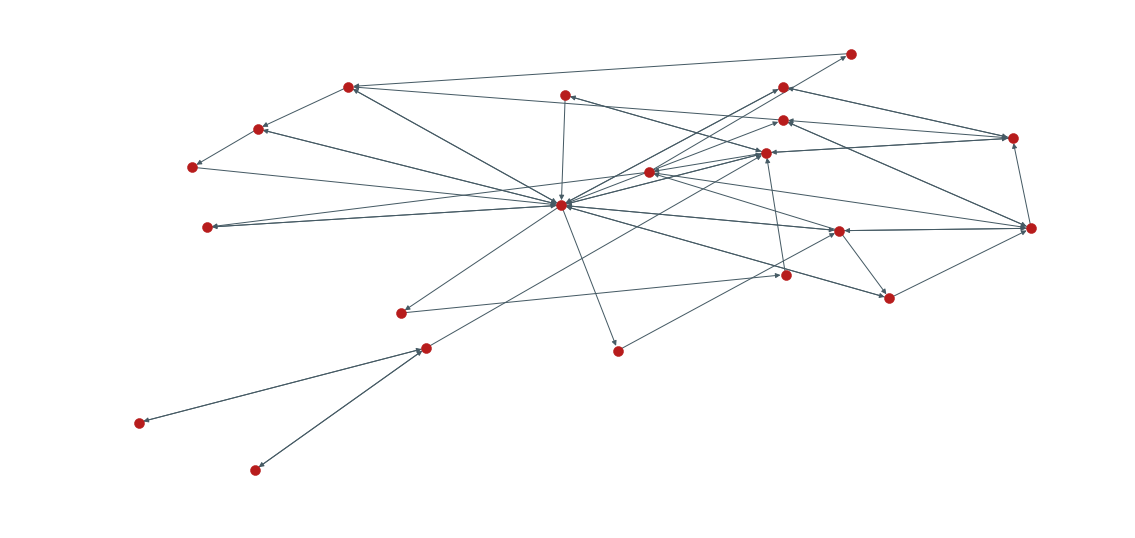

In [30]:
pos = nx.spring_layout(ConvGraph)
edge_labels = nx.get_edge_attributes(ConvGraph, 'weight')

draw_options = {
    'with_labels': False,
    'node_shape' : 'o',
    'node_color' : '#B71C1C',
    'edge_color' : '#455A64',
    'node_size'  : 100,
    'width': 1
}

nx.draw(ConvGraph, pos, **draw_options)
# nx.draw_networkx_edge_labels(ConvGraph, pos, edge_labels=edge_labels, font_color='#006064');